In [4]:
!pip install mne #If you don't already have it

In [1]:
from Dataloader import dataloader
from MakeDict import findEDF
from MNEplotter import MNEPlotter 

In [2]:
#make your own phats
data_path=r"C:\Users\Andre\Desktop\Deeplearning local\artifact_dataset\artifact_dataset"
path=r"artifact_dataset"

edfDict=findEDF(DataDir=data_path)

In [3]:
#Initialise dataloader
DL=dataloader(Time_interval=1,Overlap=0,Data_paht=data_path)
lables_decoding=DL.one_hot_eoncoding

In [4]:
#Find all atifacts in dataset takes 2 minutes
edfDict,annothlist=DL.anno_mapping(edfDict) 

annotation list dimension lable*windows with that lable each data data is savede as a list of [file id,window id]

In [5]:
#So save it
np.save('name.npy',annothlist)

NameError: name 'annothlist' is not defined

In [6]:
#Or load it
annothlist=np.load('testIDX.npy',allow_pickle=True)

In [7]:
np.shape(annothlist)

(7,)

In [5]:
#Couldent find anywere bether to place it
def make_batch(IDXlist, size=24, Nlable=6):
    """
    make balance dataset, sampling with replacement.
    
    """
    filelist = []
    windowlist = []

    if size % Nlable != 0:
        raise Exception(f"Batch size must be devedible by {Nlable}")
    fromset = int(size / Nlable)

    for i in range(Nlable):
        elements = np.random.randint(0, len(IDXlist[i]), fromset)
        for e in elements:
            window = int(IDXlist[i][e][0])
            try:  # See if window already is in list else append it
                winidx = windowlist.index(window)
                filelist[winidx].append(int(IDXlist[i][e][1]))
            except ValueError:
                windowlist.append(window)
                filelist.append([int(IDXlist[i][e][1])])

    return windowlist, filelist

In [6]:
windowlist,filelist=make_batch(annothlist,12)

In [7]:
Batch,Batch_X,Batch_Y=DL.loadBatch(edfDict=edfDict,filelist=filelist,windowlist=windowlist)

Extracting EDF parameters from C:\Users\Andre\Desktop\Deeplearning local\artifact_dataset\artifact_dataset\01_tcp_ar\099\00009939\s001_2013_03_01\00009939_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 391999  =      0.000 ...  1567.996 secs...
PHOTIC-REF
IBI
BURSTS
SUPPR
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
19
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from C:\Users\Andre\Desktop\Deeplearning local\artifact_dataset\artifact_dataset\01_tcp_ar\062\00006224\s002_2010_01_06\00006224_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 297749  =      0.000 ...  1190.996 secs...
EMG-REF
PHOTIC-REF
IBI
BURSTS
SUPPR
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4',

In [8]:
print(np.shape(Batch_X))
print(np.shape(Batch_Y))

(12, 19, 250)
(12, 6)


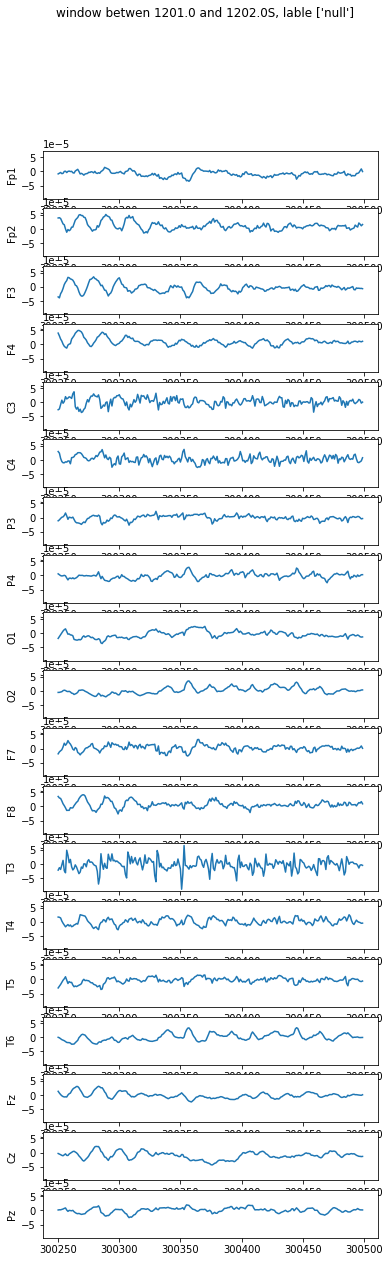

In [44]:
ploter=MNEPlotter(CH_names=DL.CH_names,lableEncoding=DL.one_hot_eoncoding) #Intitalic plotter
ploter.plot(window=Batch[0])

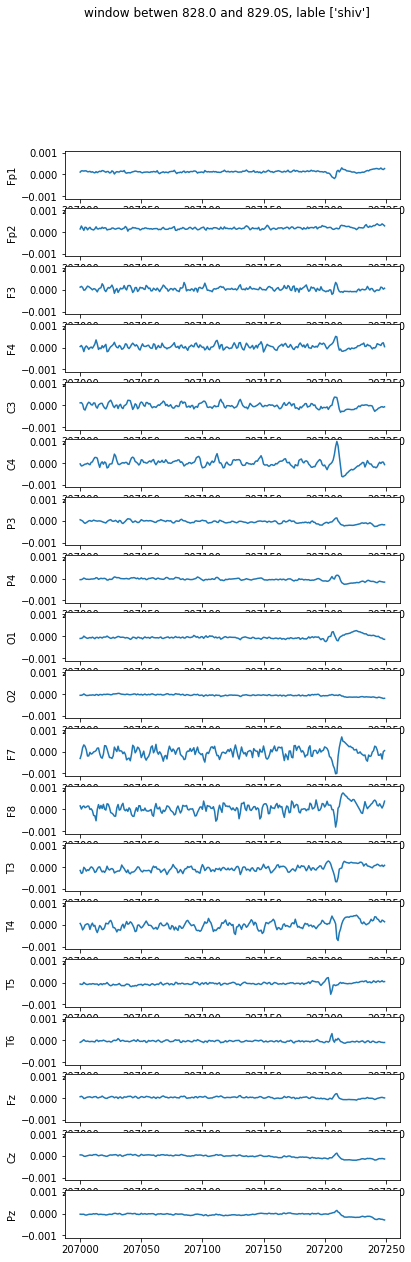

In [42]:
ploter.plot(window=Batch[6])